<h1><center> Mini Projet 1-Deep Learning</center></h1>
<h1><center> Garcelon Evrard</center></h1>

Using TensorFlow backend.


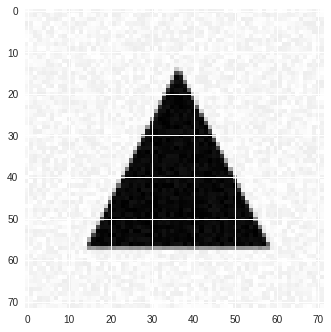

In [1]:
from mp1 import *
import numpy as np
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Flatten,Dropout
from keras.layers import BatchNormalization,Input,concatenate,Cropping2D,ZeroPadding2D
from keras.optimizers import SGD,Adam,Adagrad
from keras.layers import Conv2D, MaxPooling2D,UpSampling2D,Conv2DTranspose
from keras import regularizers
import keras.backend as K
from keras.models import Model

Attention il peut être nécessaire d'executer deux fois le code ci-dessus.

# Simple Classification :

Dans cette première question on définit un classifieur linéaire pour des carrés, cercles ou triangles centrée dans une image de taille $72\times72$.

In [0]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

nb_classes=3
X_train = X_train.astype("float32")
y_train = np_utils.to_categorical(Y_train, nb_classes)

In [13]:
input_shape = X_train.shape[1]

model = Sequential()
model.add(Dense(nb_classes, input_shape=(input_shape,), activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 3)                 15555     
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________


In [14]:
sgd = SGD(lr = 10**-3)
adam  = Adam()
batch_size = 32
epochs= 100

use_adam = True

if use_adam :
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=adam)
  
else :
  model.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=sgd)
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,  verbose=1)

Epoch 1/100
300/300 [==============================] - 0s 812us/step - loss: 1.8022 - acc: 0.4200
Epoch 2/100
300/300 [==============================] - 0s 174us/step - loss: 0.9876 - acc: 0.5033
Epoch 3/100
300/300 [==============================] - 0s 168us/step - loss: 0.5240 - acc: 0.7900
Epoch 4/100
300/300 [==============================] - 0s 164us/step - loss: 0.4099 - acc: 0.8267
Epoch 5/100
300/300 [==============================] - 0s 162us/step - loss: 0.3560 - acc: 0.8433
Epoch 6/100
300/300 [==============================] - 0s 156us/step - loss: 0.3372 - acc: 0.8233
Epoch 7/100
300/300 [==============================] - 0s 164us/step - loss: 0.3554 - acc: 0.8200
Epoch 8/100
300/300 [==============================] - 0s 204us/step - loss: 0.2349 - acc: 0.9200
Epoch 9/100
300/300 [==============================] - 0s 163us/step - loss: 0.2564 - acc: 0.8733
Epoch 10/100
300/300 [==============================] - 0s 162us/step - loss: 0.2294 - acc: 0.9267
Epoch 11/100
300/30

La précision sur l'ensemble de train est déjà très bonne pour un entraînement avec une descente de gradient stochastique, cependant avec l'algorithme adam, le réseau atteint une précisison de $1$ sur l'ensemble de test. Vérifions cette précisison sur un ensemble de train.

In [15]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
model.predict(X_test)

array([[0., 1., 0.]], dtype=float32)

Ainsi pour un seul exemple on retrouve bien un disque.

In [16]:
[X_test,Y_test] = generate_dataset_classification(300, 20)
Y_test = np_utils.to_categorical(Y_test, nb_classes)
print("Précision sur l'ensemble de test : ",model.evaluate(X_test,Y_test)[1])

300/300 [==============================] - 0s 282us/step
Précision sur l'ensemble de test :  1.0


Avec l'algorithme de descente de gradient stochastique la précision atteinte est de l'ordre de $0.98$ sur le test set avec une perte d'environ $0.2$ tandis qu'avec Adam la précision atteinte est $1$ avec une perte de $0.02$ environ. Il est donc préférable d'utiliser Adam pour la phase d'optimisation.

# Visualisation de la solution : 

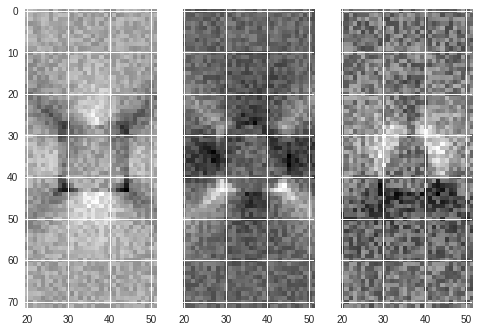

In [20]:
weights = model.get_weights()[0]

cl1 = weights[:,0].reshape((int(np.sqrt(input_shape)),int(np.sqrt(input_shape))))
cl2 = weights[:,1].reshape((int(np.sqrt(input_shape)),int(np.sqrt(input_shape))))
cl3 = weights[:,2].reshape((int(np.sqrt(input_shape)),int(np.sqrt(input_shape))))


f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

ax1.imshow(cl1,cmap = 'gray',vmin = cl1.min(),vmax = cl1.max())
ax2.imshow(cl2,cmap = 'gray',vmin = cl2.min(),vmax = cl2.max())
ax3.imshow(cl3,cmap = 'gray',vmin = cl3.min(),vmax = cl3.max())


Sur l'mage ci-dessus, on devine bien les différentes formes géométriques que lréseau est supposé classifié.

# A more difficult classification problem : 

Contrairement aux cas précédent, les figures ne sont plus contraintes à être centrées. Ce qui rend le problème plus difficle.

In [0]:
[X_train, Y_train] = generate_dataset_classification(10**3, 20, True)
[X_val,Y_val] = generate_dataset_classification(10**2,20,True)
[X_test, Y_test] = generate_test_set_classification()

nb_classes = 3
X_train = X_train.astype("float32")
X_val = X_val.astype("float32")
X_test = X_test.astype("float32")
Y_train = np_utils.to_categorical(Y_train, nb_classes)
Y_val = np_utils.to_categorical(Y_val, nb_classes)

En effet si on applique directement le réseau précédent, on obtient :

In [22]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,  verbose=1)

Epoch 1/100
1000/1000 [==============================] - 0s 151us/step - loss: 3.3997 - acc: 0.3500
Epoch 2/100
1000/1000 [==============================] - 0s 152us/step - loss: 1.8854 - acc: 0.4450
Epoch 3/100
1000/1000 [==============================] - 0s 157us/step - loss: 1.5665 - acc: 0.5080
Epoch 4/100
1000/1000 [==============================] - 0s 154us/step - loss: 1.4853 - acc: 0.5170
Epoch 5/100
1000/1000 [==============================] - 0s 149us/step - loss: 1.4170 - acc: 0.5330
Epoch 6/100
1000/1000 [==============================] - 0s 162us/step - loss: 1.0880 - acc: 0.5510
Epoch 7/100
1000/1000 [==============================] - 0s 151us/step - loss: 1.1594 - acc: 0.5420
Epoch 8/100
1000/1000 [==============================] - 0s 150us/step - loss: 1.1797 - acc: 0.5430
Epoch 9/100
1000/1000 [==============================] - 0s 156us/step - loss: 0.9483 - acc: 0.5790
Epoch 10/100
1000/1000 [==============================] - 0s 152us/step - loss: 0.8983 - acc: 0.5800

In [23]:
print("Précision sur l'ensemble de test : ",model.evaluate(X_test,Y_test)[1])

300/300 [==============================] - 0s 95us/step
Précision sur l'ensemble de test :  0.5866666662693024


Ainsi, la précision atteinte est bien moindre dans ce cas-ci aussi bien pour le test set que le train set. 

Il est donc nécessaire de changer d'architecture de réseau. La nouvelle architecture repose sur une convolution avec un noyau de taille $5$ et une stride de $2$, cette couche est suivie par une opération de max_pooling avec un assez large noyau, comme suggéré dans le texte du DM. L'algorithme d'optimisation utilisé est toujours Adam.

In [0]:
size = int(np.sqrt(X_train.shape[1]))
nb_samples_train = X_train.shape[0]
nb_samples_test = X_test.shape[0]
nb_samples_val = X_val.shape[0]
X_train = X_train.reshape(nb_samples_train,size,size,1)
X_val = X_val.reshape(nb_samples_val,size,size,1)


X_test = X_test.reshape(nb_samples_test,size,size,1)
input_shape = (size,size,1)

In [90]:
model_conv = Sequential()
model_conv.add(Conv2D(16, kernel_size=(5, 5),activation='relu',input_shape=input_shape, strides = 2))
model_conv.add(Dropout(0.2))
model_conv.add(MaxPooling2D(pool_size=(10, 10)))
model_conv.add(Flatten())
model_conv.add(Dense(512,activation = 'relu'))
model_conv.add(Dropout(0.2))
model_conv.add(Dense(3,activation = 'softmax'))

model_conv.summary()

adam = keras.optimizers.Adam(lr = 1*10**-3,beta_1=0.9, beta_2=0.999, epsilon=None, decay=10**-7, amsgrad=True)
batch_size = 32
epochs = 1*10**2
model_conv.compile(loss='categorical_crossentropy',metrics=['accuracy'],  optimizer=adam)
model_conv.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,  verbose=1,validation_data = (X_val,Y_val))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 34, 34, 16)        416       
_________________________________________________________________
dropout_34 (Dropout)         (None, 34, 34, 16)        0         
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_35 (Flatten)         (None, 144)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 512)               74240     
_________________________________________________________________
dropout_35 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 3)                 1539      
Total para

In [92]:
 print("Précision sur l'ensemble de test : ",model_conv.evaluate(X_test,Y_test)[0])

300/300 [==============================] - 0s 138us/step
Précision sur l'ensemble de test :  0.12338954498370489


Les performances sont donc bien meilleur que pour un classifieur linéaire. Avec une perte d'environ $0.12$ sur l'ensemble de test et $0.0209$ sur l'ensemble d'entraînement. Le réseau semble donc overfit l'ensemble d'entraînement malgré l'addition d'une couche de Dropout.

# Un problème de régression : 

Avant d'entraîner un réseau de neurones sur ce problème, il est nécessaire de pré-traiter les données. En particulier, les positions des sommets, en effet ceux-ci sont ordonnés de façon aléatoire dans le vecteur $Y$ de base, ce qui rend l'apprentissage pour un réseau de neurones difficile.  

Pour résoudre ce problème, plusieurs solutions sont envisengeables, la plus simple consiste à simplement organiser les sommets par ordre croissant en terme de norme euclidienne. C'est-à-dire que le vecteur $Y = [0.18 ,0.78, 0.49, 0.99,0.51, 0.79]$ correspondant au triangle dont les sommets se situent aux positions : $(0.18,0.78)$, $(0.49,0.99)$ et $(0.51,0.79)$ sera réorganisé de la manière suivante : $Y = [0.18 ,0.78, ,0.51, 0.79,0.49, 0.99]$.  Les différents transformations de $Y$ donnent toutes des résultats en terme de perte assez similaires, toutefois visuellment les résultats peuvent être assez dfiférents. Dans la suite on utilise la fonction $processingdata2$ qui ordonne les sommets par ordre croissant en terme de norme $\ell_{1}$.


In [0]:
[X_train, Y_train] = generate_dataset_regression(5*10**3, 20)
[X_val, Y_val] = generate_dataset_regression(10**2, 20)
[X_test, Y_test] = generate_test_set_regression()
size = int(np.sqrt(X_train.shape[1]))
input_shape = (size,size,1)
nb_samples = X_train.shape[0]
nb_val = X_val.shape[0]
nb_test = X_test.shape[0]
X_train = X_train.reshape(nb_samples,size,size,1)
X_val = X_val.reshape(nb_val,size,size,1)
X_test = X_test.reshape(nb_test,size,size,1)

def processing_data(Y): 
    Y_x = Y[:,::2]
    Y_y = Y[:,1::2]
    YY = 0*Y
    for i in range(len(Y)) :
        min_y = np.argwhere(Y_y[i] == np.min(Y_y[i]))
        l = []
        if len(min_y) > 1:
            if Y_x[i,min_y[0]] > Y_x[i,min_y[1]] :
                min_y = min_y[1]
            else :
                min_y = min_y[0]
        sorte = [min_y]
        ll = [0,1,2]
        ll.remove(min_y)
        if Y_x[i,ll[0]] > Y_x[i,ll[1]] :
            sorte += ll[::-1]
        else :
            sorte += ll
        for k in sorte :
            l += [Y_x[i,k],Y_y[i,k]]
        YY[i] = np.array(l)
    return YY

def processing_data2(Y) :
    Y_x = Y[:,::2]
    Y_y = Y[:,1::2]
    YY = 0*Y
    sorte = np.argsort(Y_x + Y_y,axis = 1)
    for i in range(len(Y)) :
        ordre = sorte[i]
        ll = []
        for k in ordre :
            ll += [Y_x[i,k],Y_y[i,k]]
        YY[i] = np.array(ll)
    return YY

def processing_data3(Y) :
    Y_x = Y[:,::2]
    Y_y = Y[:,1::2]
    YY = 0*Y
    sorte = np.argsort(Y_x ,axis = 1)
    for i in range(len(Y)) :
        ordre = sorte[i]
        ll = []
        for k in ordre :
            ll += [Y_x[i,k],Y_y[i,k]]
        YY[i] = np.array(ll)
    return YY

def processing_data5(Y) :
    Y_x = Y[:,::2]
    Y_y = Y[:,1::2]
    YY = 0*Y
    for i in range(len(Y)) :
        ordre = []
        min_x = np.random.choice(np.argwhere(Y_x[i] == min(Y_x[i]))[0])
        max_x = np.random.choice(np.argwhere(Y_x[i] == max(Y_x[i]))[0])
        ordre = [min_x,max_x]
        for j in range(3):
            if not(j in ordre) :
                ordre.append(j)
        ll = []
        for k in ordre :
            ll += [Y_x[i,k],Y_y[i,k]]
        YY[i] = np.array(ll)
    return YY
  
def processing_data6(Y) :
    Y_x = Y[:,::2]
    Y_y = Y[:,1::2]
    YY = 0*Y
    sorte = np.argsort(np.sqrt((Y_x-1/2)**2 + (Y_y-1/2)**2) ,axis = 1)
    for i in range(len(Y)) :
        ordre = sorte[i]
        ll = []
        for k in ordre :
            ll += [Y_x[i,k],Y_y[i,k]]
        YY[i] = np.array(ll)
    return YY


Y_train = processing_data2(Y_train)
Y_val = processing_data2(Y_val)
Y_test = processing_data2(Y_test)

mean_train,std_train = np.mean(Y_train,axis = 0),np.std(Y_train,axis = 0)
mean_val,std_val = np.mean(Y_val,axis = 0),np.std(Y_val,axis = 0)

#Y_train = (Y_train - mean_train)/std_train
#Y_val = (Y_val - mean_val)/std_val
#Y_test = (Y_test - mean_train)/std_train

Visualisation d'un triangle du train set


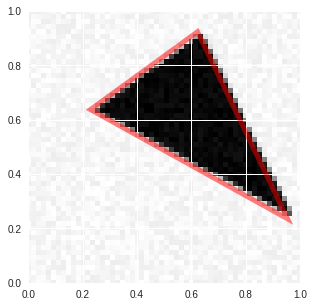

In [98]:
print("Visualisation d'un triangle du train set")
i = np.random.randint(len(X_train))
visualize_prediction(X_train[i],Y_train[i])

Le réseau de neurones utilisé pour la régression est un réseau classique avec trois couches à convolutions chacune suivie d'un max pooling et enfin une dernière couche de convolution sans max pooling. Ces couches sont suivies de couches fully connected assez profondes pour améliorer l'expréssivité du réseau. La dernière fonction d'activation est une sigmoid afin de contraindre les prédictions du réseau à être entre $0$ et $1$. 

Pour l'entraînement, la norme $\ell_{1}$ est utilisée car celle-ci est plus naturelle dans ce contexte étant donné que le but est de mesurer l'erreur entre deux coordonéées dans $[0,1]$. Toutefois, ce choix ne semble pas avoir un grand impact sur les résultats obtenus.



In [95]:
model_reg = Sequential()


model_reg.add(Conv2D(128, kernel_size=(3,3),activation='relu',input_shape=input_shape,strides = 1))
model_reg.add(MaxPooling2D(pool_size = (2,2)))
model_reg.add(Dropout(0.1))
model_reg.add(Conv2D(128, kernel_size=(3,3),activation='relu',strides = 1))
model_reg.add(Dropout(0.1))
model_reg.add(MaxPooling2D(pool_size = (2,2)))
model_reg.add(Conv2D(128, kernel_size=(3,3),activation='relu',strides = 1))
model_reg.add(Dropout(0.1))
model_reg.add(MaxPooling2D(pool_size = (2,2)))
model_reg.add(Conv2D(128, kernel_size=(3,3),activation='relu',strides = 1))
model_reg.add(Dropout(0.1))
model_reg.add(Flatten())
model_reg.add(Dense(128,activation = 'relu'))
model_reg.add(Dropout(0.1))
model_reg.add(Dense(128,activation = 'relu'))
model_reg.add(Dropout(0.1))
model_reg.add(Dense(128,activation = 'relu'))
model_reg.add(Dropout(0.1))
model_reg.add(Dense(128,activation = 'relu'))
model_reg.add(Dropout(0.1))
model_reg.add(Dense(6,activation = 'sigmoid'))



model_reg.summary()

batch_size = 32
epochs = 1*10**2
adam = keras.optimizers.Adam(lr = 10**-3,beta_1=0.9, beta_2=0.999, epsilon=None, decay=0, amsgrad=True)
earlyStopping=keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1, mode='auto')
model_reg.compile(loss='mae',  optimizer=adam)
model_reg.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data = (X_val,Y_val),callbacks = [earlyStopping])




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 70, 70, 128)       1280      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
dropout_44 (Dropout)         (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 33, 33, 128)       147584    
_________________________________________________________________
dropout_45 (Dropout)         (None, 33, 33, 128)       0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 14, 14, 128)       147584    
__________

300/300 [==============================] - 0s 924us/step
Test Loss : 0.03113937055071195
Exemple d'une prédiction pour un cas difficile du test set


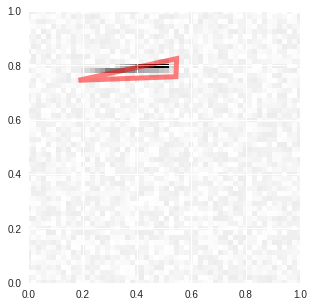

In [96]:
print('Test Loss :', model_reg.evaluate(X_test,Y_test))
pred = model_reg.predict(X_test)[1]

print("Exemple d'une prédiction pour un cas difficile du test set")
visualize_prediction(X_test[1],pred)


Triangle avec la plus grande erreur en norme 1


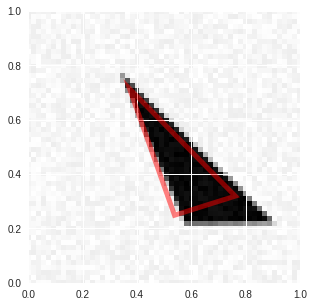

Erreur de : 0.3291631274044464
Triangle avec la plus petite erreur en norme 1


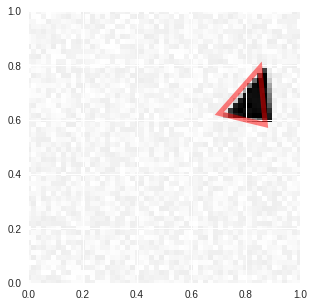

Erreur de : 0.005756247457354868


In [99]:
pred = model_reg.predict(X_test)
indice_erreur = 0
erreur = np.mean(np.abs(pred - Y_test),axis = 1)
max_erreur = np.max(erreur)
min_erreur = np.min(erreur)
indice_erreur = np.argmax(erreur)
indice = np.argmin(erreur)

print("Triangle avec la plus grande erreur en norme 1")
visualize_prediction(X_test[indice_erreur],pred[indice_erreur] )
print('Erreur de :', max_erreur)

print("Triangle avec la plus petite erreur en norme 1")
visualize_prediction(X_test[indice],pred[indice])
print('Erreur de :', min_erreur)

Exemple de prédictions sur le test set.


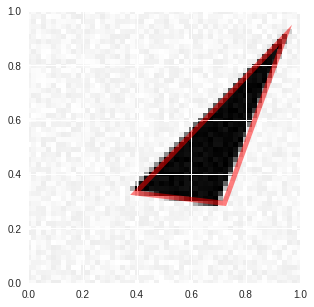

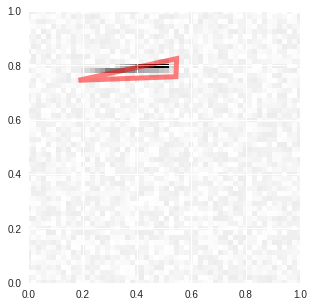

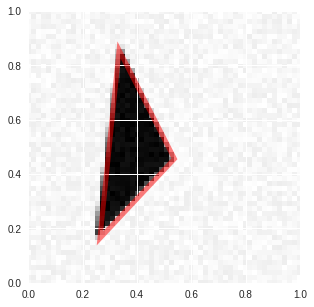

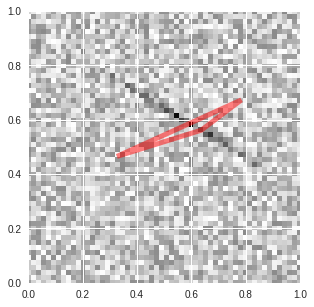

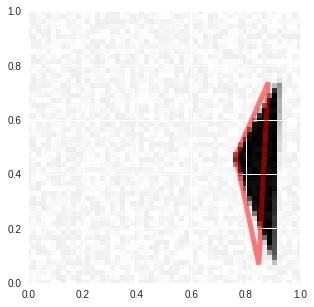

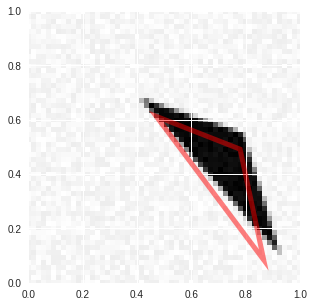

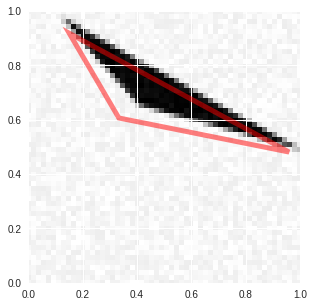

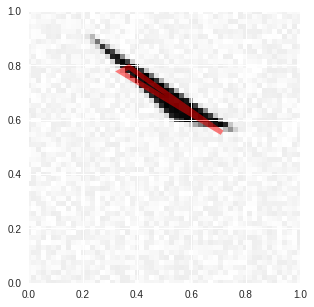

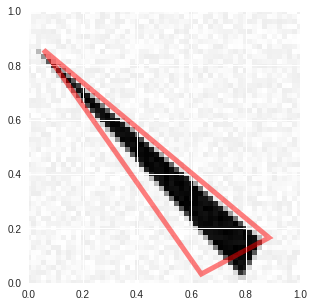

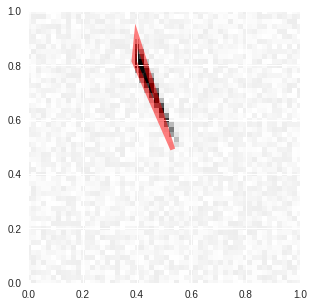

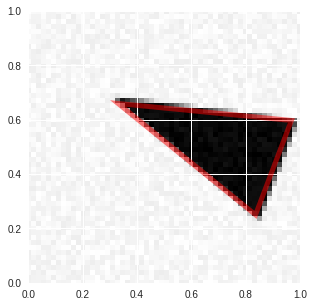

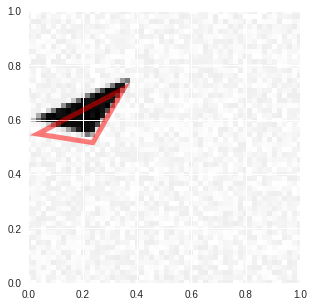

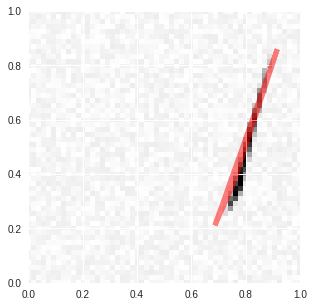

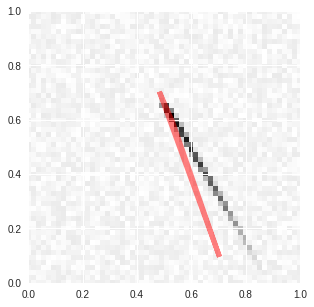

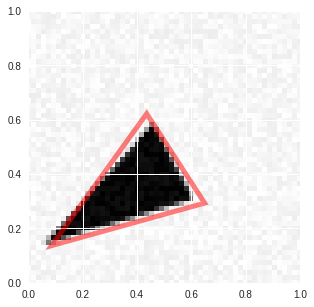

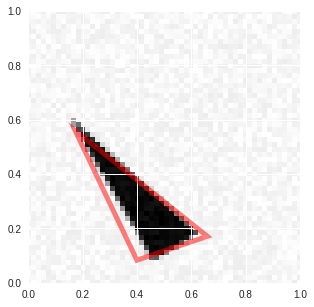

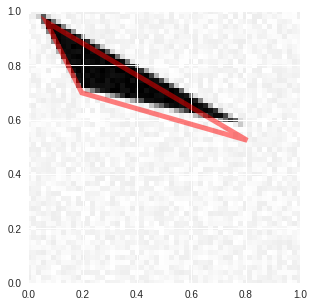

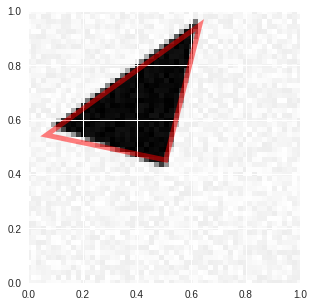

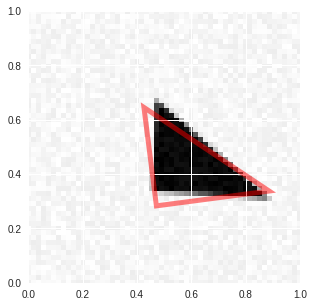

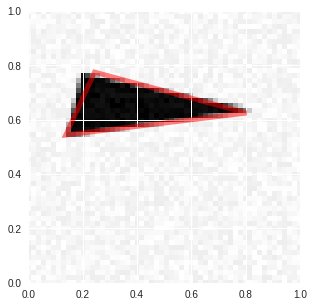

In [100]:
print("Exemple de prédictions sur le test set.")
pred = model_reg.predict(X_test)
for j in range(20) :
    visualize_prediction(X_test[j],pred[j])

In [0]:
model_reg.save_weights("model_reg.h5")

On observe ainsi que malgré une valeur de la fonction de perte assez faible, les résultats ne sont pas forcément très satisfaisants visuellement parlant. En particulier pour des triangles quasi dégénérés, c'est-à-dire des triangles pour lesquels les sommets sont presque alignés.

De plus, le réordonnancement des sommets ne semble pas améliorer les résultats pour ces triangles et l'ajout de couche de convolution ne permet d'améliorer sensiblement les performances.

# Débruitage d'images : 

Les méthodes à bases de réseau de neurones pour le débruitage d'images sont en quelques années devenues aussi performantes que les méthodes classiques. Ici, afin de débruiter des images on entraîne un réseau U-Net classique avec une fonction de perte quadratique. On voit qu'en seulement une cinquantaine d'epochs le réseau renvoie un résultat débruitée excellent. Toutefois, il faut se rappeler que la situation est ici très simple avec seulement des pixels blancs ou noirs et des formes géométriques simples.

In [102]:
def get_crop_shape(target, refer):
        # width, the 3rd dimension
        cw = (target.get_shape()[2] - refer.get_shape()[2]).value
        assert (cw >= 0)
        if cw % 2 != 0:
            cw1, cw2 = int(cw/2), int(cw/2) + 1
        else:
            cw1, cw2 = int(cw/2), int(cw/2)
        # height, the 2nd dimension
        ch = (target.get_shape()[1] - refer.get_shape()[1]).value
        assert (ch >= 0)
        if ch % 2 != 0:
            ch1, ch2 = int(ch/2), int(ch/2) + 1
        else:
            ch1, ch2 = int(ch/2), int(ch/2)

        return (ch1, ch2), (cw1, cw2)
    
input_shape = (72,72,1)    
inputs = Input(input_shape)
conv1 = Conv2D(32, kernel_size = (3,3), activation = 'relu',padding="same")(inputs)
BN1   = BatchNormalization()(conv1)
conv1 = Conv2D(32, kernel_size = (3,3), activation = 'relu',padding="same")(BN1)
BN1   = BatchNormalization()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(BN1)
conv2 = Conv2D(64, kernel_size = (3,3), activation = 'relu',padding="same")(pool1)
BN2   = BatchNormalization()(conv2)
conv2 = Conv2D(64, kernel_size = (3,3), activation = 'relu',padding="same")(BN2)
BN2   = BatchNormalization()(conv2)
pool3 = MaxPooling2D(pool_size=(2, 2))(BN2)
conv3 = Conv2D(128, kernel_size = (3,3), activation = 'relu',padding="same")(pool3)
BN3  = BatchNormalization()(conv3)
conv3 = Conv2D(128, kernel_size = (3,3), activation = 'relu',padding="same")(BN3)
BN3   = BatchNormalization()(conv3)

up_conv3 = UpSampling2D(size = (2,2))(BN3)
ch, cw = get_crop_shape(conv2, up_conv3) 
crop_conv2 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv2)
up4 = concatenate([up_conv3,crop_conv2], axis = 3)
conv4 = Conv2D(64, kernel_size = (3,3), activation = 'relu',padding="same")(up4)
BN4  = BatchNormalization()(conv4)
conv4 = Conv2D(64, kernel_size = (3,3), activation = 'relu',padding="same")(BN4)
BN4 = BatchNormalization()(conv4)

up_conv2 = UpSampling2D(size = (2,2))(BN4)
ch, cw = get_crop_shape(conv1, up_conv2) 
crop_conv1 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv1)
up5 = concatenate([up_conv2,crop_conv1], axis = 3)
conv5 = Conv2D(32, kernel_size = (3,3), activation = 'relu',padding="same")(up5)
BN5   = BatchNormalization()(conv5)
conv5 = Conv2D(32, kernel_size = (3,3), activation = 'relu',padding="same")(BN5)
BN5   = BatchNormalization()(conv5)

ch, cw = get_crop_shape(inputs, BN5)
conv6 = ZeroPadding2D(padding=((ch[0], ch[1]), (cw[0], cw[1])))(BN5)
conv7 = Conv2D(1, (1, 1),activation = 'hard_sigmoid')(conv6)


model_unet = Model(input = inputs, output = conv7)


model_unet.compile(optimizer = 'adam', loss = 'mse')
    
model_unet.summary()
        
        
        

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_44 (Conv2D)              (None, 72, 72, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 72, 72, 32)   128         conv2d_44[0][0]                  
__________________________________________________________________________________________________
conv2d_45 (Conv2D)              (None, 72, 72, 32)   9248        batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_norm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
X_train,Y_train = generate_dataset_noisy(10**3,30)
X_val,Y_val = generate_dataset_noisy(100,30)
X_test,Y_test = generate_dataset_noisy(300,30)
size = int(np.sqrt(X_train.shape[1]))
input_shape = (size,size,1)

def processing_data(X,Y) :
    nb_samples = X.shape[0]
    X = X.reshape(nb_samples,size,size,1)/255
    Y = Y.reshape(nb_samples,size,size,1)/255
    return X,Y

X_train,Y_train =  processing_data(X_train,Y_train)
X_val,Y_val =  processing_data(X_val,Y_val)
X_test,Y_test =  processing_data(X_test,Y_test)

In [104]:
batch_size = 64
epochs = 50

earlyStopping=keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
model_unet.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data = (X_val,Y_val),callbacks = [earlyStopping])

Train on 1000 samples, validate on 100 samples
Epoch 1/50
1000/1000 [==============================] - 11s 11ms/step - loss: 0.1671 - val_loss: 0.9563
Epoch 2/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0945 - val_loss: 0.9557
Epoch 3/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0621 - val_loss: 0.9541
Epoch 4/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0423 - val_loss: 0.8895
Epoch 5/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0288 - val_loss: 0.5884
Epoch 6/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0170 - val_loss: 0.0206
Epoch 7/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0088 - val_loss: 0.0054
Epoch 8/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0051 - val_loss: 0.0041
Epoch 9/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0030 - val_loss: 0.0057
Epoch 10/50
1000/1000 [==========

In [110]:
pred = model_unet.predict(X_test)
loss = model_unet.evaluate(X_test,Y_test)
print('Perte sur le test set :',loss)

300/300 [==============================] - 0s 1ms/step
Perte sur le test set : 0.0004201635097463926


Text(0.5,1,'Image originale')

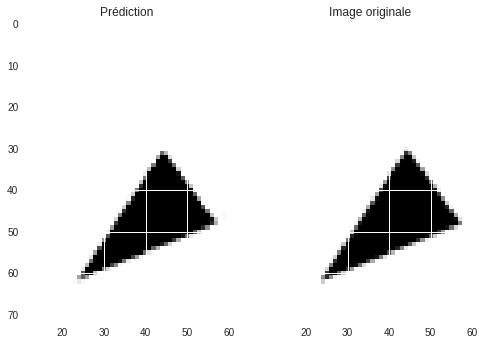

In [116]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.imshow(pred[0][:,:,0],cmap = 'gray',vmin = 0,vmax = 1)
ax1.set_title('Prédiction')
ax2.imshow(Y_test[0][:,:,0],cmap = 'gray')
ax2.set_title('Image originale')

#Conclusion

En conclusion,  dans ce mini-projet nous avions étudié trois problèmes bien différents.

Le premier est un problème de classification, où l'on a mis en évidence le fait de savoir que les objets se situent tous dans la même région réduit drastiquement la difficulté du problème. Toutefois, dans le cas contraire il est nécessaire de faire appel à des structures plus complexes tel que des couches à convolution.

Le deuxième prolbème est un problème de régression qui paraît assez simple en apparence mais est malgré tout assez complexe en raison de triangles dégénérés. 

Enfin, le dernier problème est le débruitage d'image où l'on a pu illustré le potentiel des méthodes de débruitages basées sur le deep learning et en particulier les réseaux de type U-Net.